In [7]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import time

plt.rcParams.update({'font.size': 18})

In [8]:
h5_file = "test_file.h5"

Reading test_file.h5


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   2.,   1.,   1.,   1.,   0.,   2.,   1.,   7.,   3.,
          6.,  25.,  34.,  48.,  72.,  90., 122., 174., 195., 228., 274.,
        278., 316., 310., 317., 335., 229., 211., 216., 164., 126.,  98.,
         60.,  51.,  36.,  23.,  13.,   8.,   4.,   4.,   1.,   1.,   2.,
          1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          1.]),
 array([-6.06675819e-03, -5.97414933e-03, -5.88154001e-03, -5.78893116e-03,
        -5.69632230e-03, -5.60371298e-03, -5.51110413e-03, -5.41849528e-03,
        -5.32588596e-03, -5.23327710e-03, -5.14066825e-03, -5.04805893e-03,
        -4.95545007e-03, -4.86284122e-03, -4.77023236e-03, -4.67762304e-03,
        -4.585

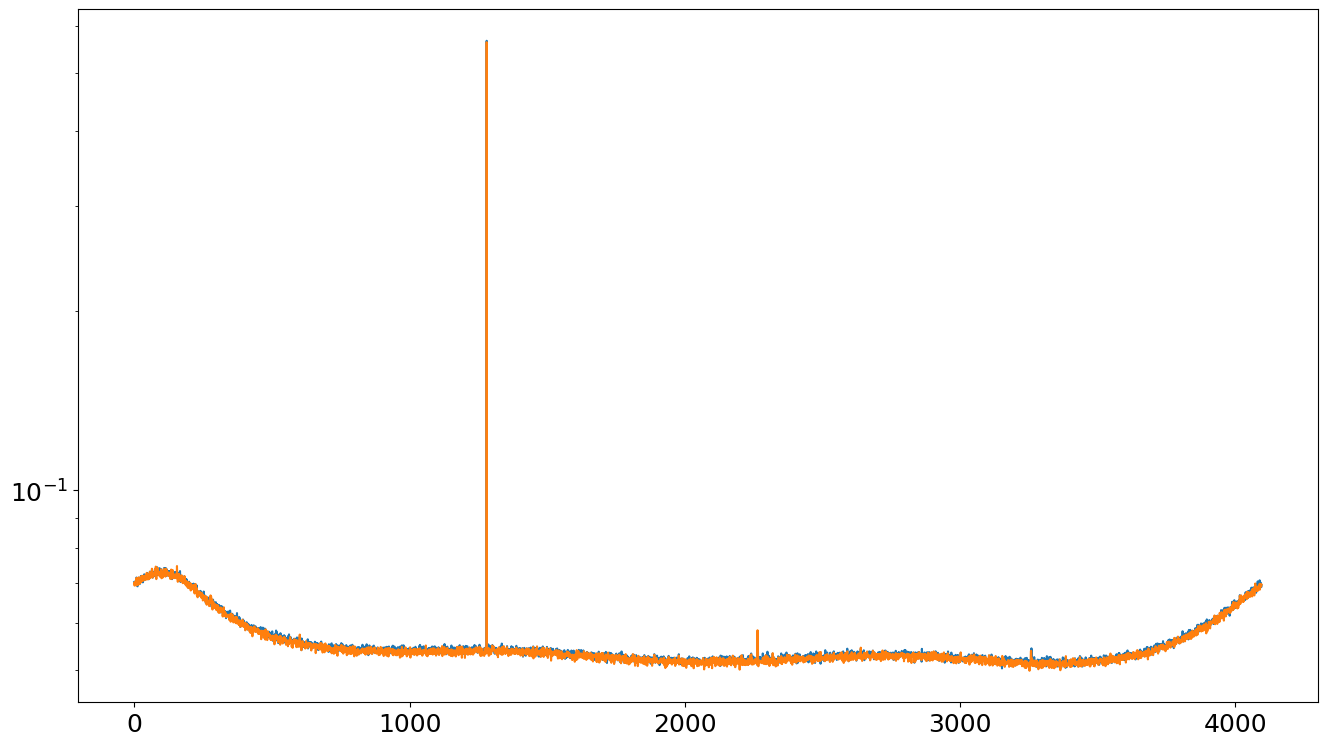

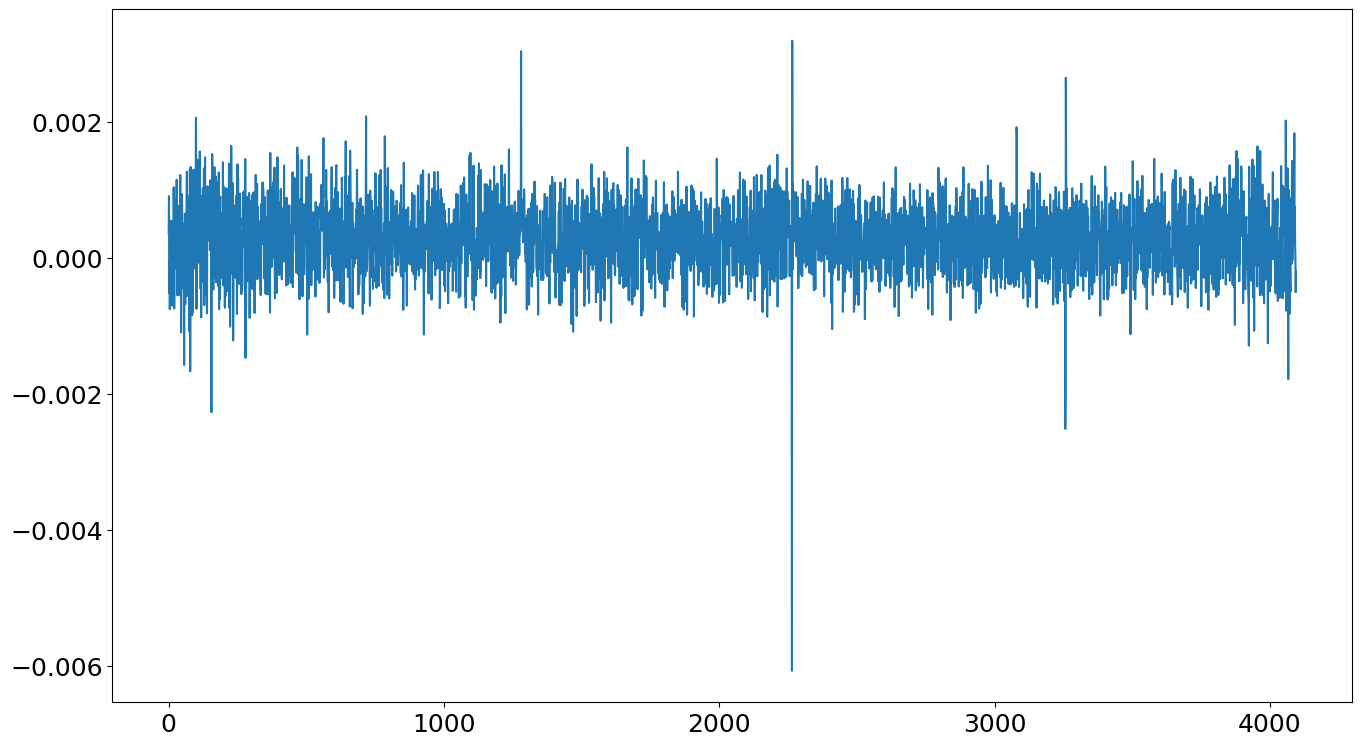

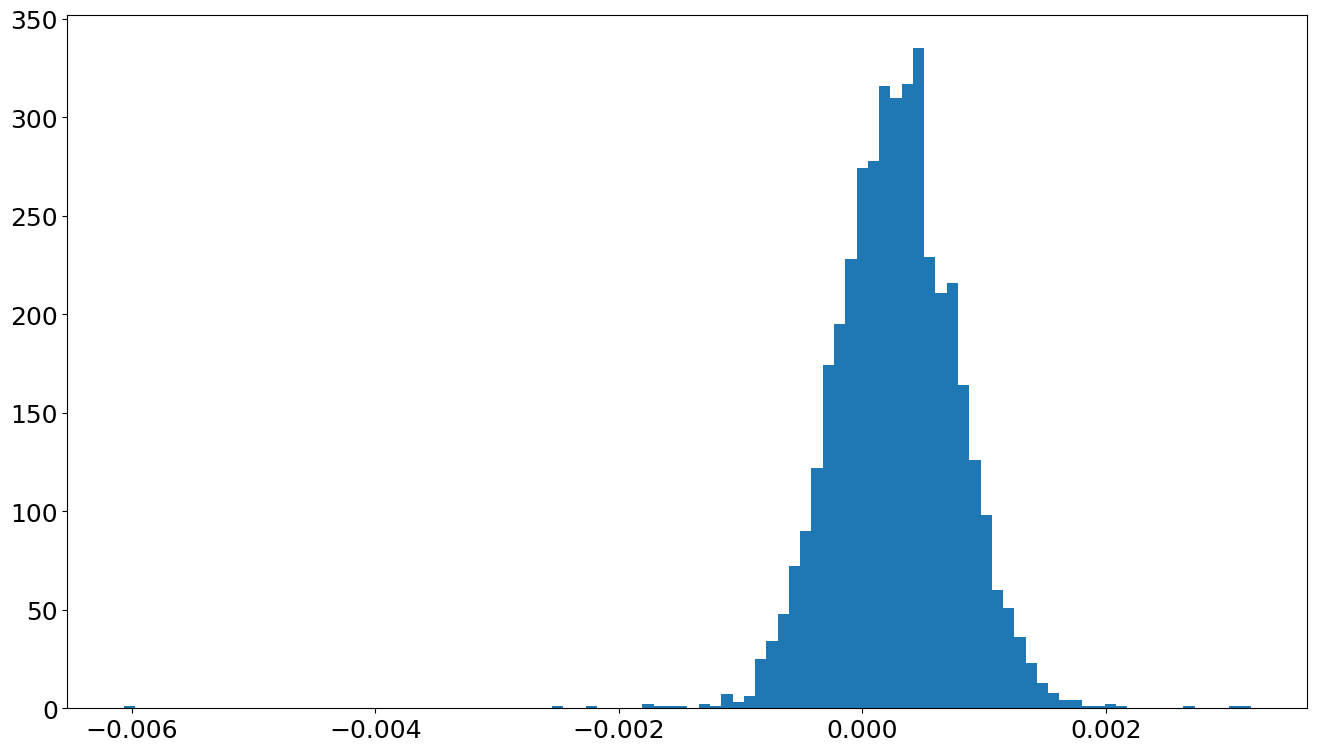

In [9]:
print ("Reading",h5_file)
hf = h5py.File(h5_file, 'r')

len_data = hf["data/timestamps"][()].shape[0]
len_cal_data = int(len_data/3)-1

ant_index  = np.where(hf["data/obssource"][()]==0)[0][0:len_cal_data]
cold_index = np.where(hf["data/obssource"][()]==1)[0][0:len_cal_data]
hot_index  = np.where(hf["data/obssource"][()]==2)[0][0:len_cal_data]

ant_data = hf["data/radio"][()][ant_index, :]
cold_data = hf["data/radio"][()][cold_index, :]
hot_data = hf["data/radio"][()][hot_index, :]
temperature = hf["data/temperature"][()][ant_index]
ant_tstamps = hf["data/timestamps"][()][ant_index]
hf.close()

ant_calibrated = ant_data/(hot_data - cold_data)
cold_calibrated = cold_data/(hot_data - cold_data)

mean_ant_power = np.mean(ant_calibrated, axis=1)
mean_ant_spectrum = np.mean(ant_calibrated, axis=0)

mean_cold_power = np.mean(cold_calibrated, axis=1)
mean_cold_spectrum = np.mean(cold_calibrated, axis=0)

plt.figure(figsize=(16,9))
plt.semilogy(mean_ant_spectrum)
plt.semilogy(mean_cold_spectrum)

plt.figure(figsize=(16,9))
plt.plot(mean_ant_spectrum-mean_cold_spectrum)

plt.figure(figsize=(16,9))
plt.hist(mean_ant_spectrum-mean_cold_spectrum, bins=100)

# plt.figure(figsize=(16,9))
# plt.semilogy(ant_data.T)
# plt.semilogy(hot_data.T)
# plt.semilogy(cold_data.T)

# plt.figure(figsize=(16,9))
# plt.plot(ant_tstamps, mean_ant_power)

# plt.figure(figsize=(16,9))
# plt.plot(ant_tstamps, temperature)
